## Apple Health Processor

-----

## Dependencies and Libraries

In [1]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [2]:
# functions to convert UTC to Shanghai time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('Asia/Shanghai'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Steps

In [3]:
steps = pd.read_csv("data/StepCount.csv")

In [4]:
steps.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
109498,Mark’s Apple Watch,5.2,"<<HKDevice: 0x280ce9720>, name:Apple Watch, ma...",StepCount,count,2019-07-11 15:21:34 +0800,2019-07-11 15:11:22 +0800,2019-07-11 15:13:56 +0800,47
109499,Mark’s Apple Watch,5.2,"<<HKDevice: 0x280ce9680>, name:Apple Watch, ma...",StepCount,count,2019-07-11 15:48:35 +0800,2019-07-11 15:38:21 +0800,2019-07-11 15:38:24 +0800,8
109500,Mark’s Apple Watch,5.2,"<<HKDevice: 0x280ce95e0>, name:Apple Watch, ma...",StepCount,count,2019-07-11 16:16:33 +0800,2019-07-11 15:57:54 +0800,2019-07-11 16:07:36 +0800,136
109501,Mark’s Apple Watch,5.2,"<<HKDevice: 0x280ce9540>, name:Apple Watch, ma...",StepCount,count,2019-07-11 16:18:52 +0800,2019-07-11 16:08:07 +0800,2019-07-11 16:17:37 +0800,349
109502,Mark’s Apple Watch,5.2,"<<HKDevice: 0x280ce94a0>, name:Apple Watch, ma...",StepCount,count,2019-07-11 16:29:21 +0800,2019-07-11 16:18:18 +0800,2019-07-11 16:19:12 +0800,25


In [5]:
# parse out date and time elements as Shanghai time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)

In [6]:
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Mark’s Apple Watch,3.1.3,"<<HKDevice: 0x280cb8320>, name:Apple Watch, ma...",StepCount,count,2017-04-12 13:17:21 +0800,2017-04-12 12:59:26+08:00,2017-04-12 13:05:31 +0800,8,2017,2017-04,2017-04-12,12,20,2
1,Mark’s Apple Watch,3.1.3,"<<HKDevice: 0x280cb83c0>, name:Apple Watch, ma...",StepCount,count,2017-04-12 13:50:23 +0800,2017-04-12 13:43:54+08:00,2017-04-12 13:44:55 +0800,29,2017,2017-04,2017-04-12,12,21,2
2,"“马克\的 iPhone""",10.3.1,"<<HKDevice: 0x280cb8000>, name:iPhone, manufac...",StepCount,count,2017-04-12 13:52:49 +0800,2017-04-12 13:43:54+08:00,2017-04-12 13:44:48 +0800,25,2017,2017-04,2017-04-12,12,21,2
3,"“马克\的 iPhone""",10.3.1,"<<HKDevice: 0x280cb8410>, name:iPhone, manufac...",StepCount,count,2017-04-12 13:52:49 +0800,2017-04-12 13:51:44+08:00,2017-04-12 13:52:21 +0800,37,2017,2017-04,2017-04-12,12,21,2
4,Mark’s Apple Watch,3.1.3,"<<HKDevice: 0x280cb84b0>, name:Apple Watch, ma...",StepCount,count,2017-04-12 13:59:45 +0800,2017-04-12 13:50:01+08:00,2017-04-12 13:51:41 +0800,34,2017,2017-04,2017-04-12,12,21,2


In [7]:
steps.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date', 'day', 'hour',
       'dow'],
      dtype='object')

In [8]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')

In [9]:
steps_by_date.tail()

,date,Steps
817,2019-07-08,18749
818,2019-07-09,9626
819,2019-07-10,3951
820,2019-07-11,5645
821,2019-07-12,374


In [10]:
# steps_by_date.tail(10)
steps_by_date.to_csv("data/steps_per_day.csv", index=False)

-----

### Use Only Watch Steps, Remove Phone Steps

In [11]:
steps_device_by_year = steps.groupby(['year', 'sourceName'])['value'].sum().reset_index(name='Steps')

In [12]:
steps_device_by_year

,year,sourceName,Steps
0,2017,Mark’s Apple Watch,3212141
1,2017,"“马克\的 iPhone""",2261173
2,2018,Mark’s Apple Watch,3849766
3,2018,Mi Fit,1125700
4,2018,"“马克\的 iPhone""",2691972
5,2019,Mark’s Apple Watch,1748191
6,2019,Mi Fit,320258
7,2019,"“马克\的 iPhone""",1097233


In [13]:
steps.sourceName.unique()

array(['Mark’s Apple\xa0Watch', '“马克\\的 iPhone"', 'Mi Fit'], dtype=object)

In [14]:
# drop phone steps
steps = steps[steps.sourceName == 'Mark’s Apple\xa0Watch']
# steps.head()

## Rolling Average

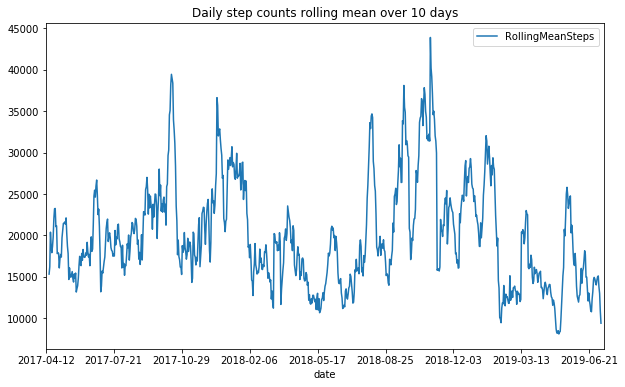

In [15]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=10, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 10 days', figsize=[10, 6])

## Steps by Day of Week

In [16]:
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
steps_by_date['dow'] = steps_by_date['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

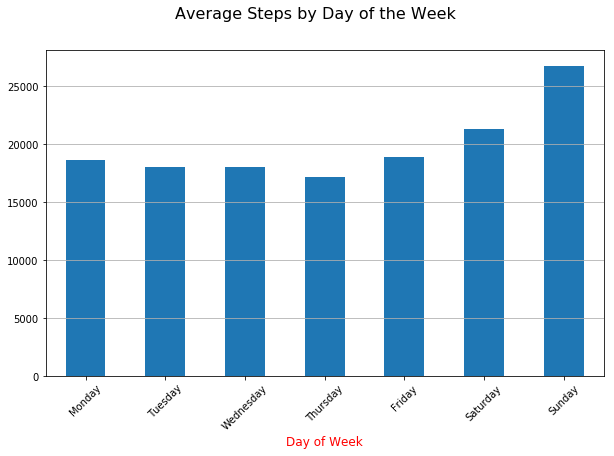

In [17]:
data = steps_by_date.groupby(['dow'])['Steps'].mean()

fig, ax = plt.subplots(figsize=[10, 6])
ax = data.plot(kind='bar', x='day_of_week')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)

plt.suptitle('Average Steps by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='red')

------

## Monthly Steps

In [18]:
total_steps_by_month = steps.groupby(['month'])['value'].sum().reset_index(name='Steps')

In [19]:
total_steps_by_month

,month,Steps
0,2017-04,204787
1,2017-05,339449
2,2017-06,373261
3,2017-07,333885
4,2017-08,364221
5,2017-09,400836
6,2017-10,436496
7,2017-11,331955
8,2017-12,427251
9,2018-01,435929


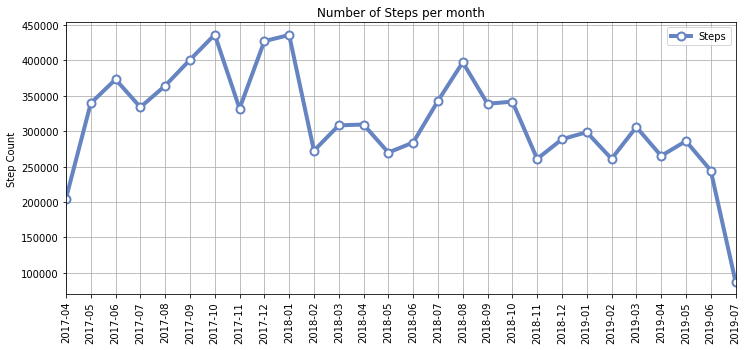

In [20]:
# a bit of a hackish solution, could use improvement
dataset = total_steps_by_month
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Steps Per Year

In [21]:
total_steps_by_years = steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

In [22]:
total_steps_by_years

,year,Steps
0,2017,3212141
1,2018,3849766
2,2019,1748191


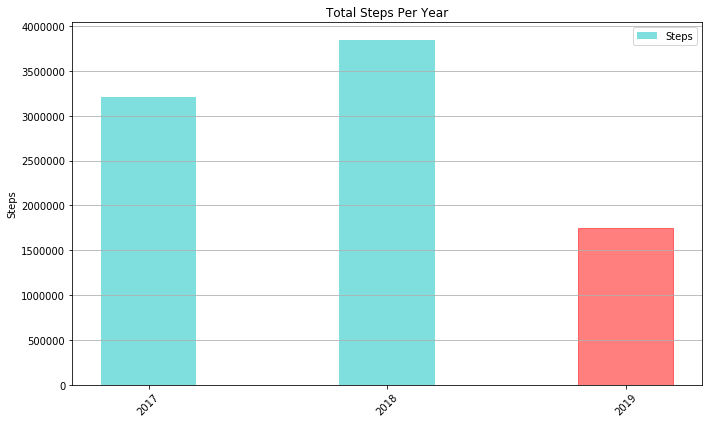

In [23]:
dataset = total_steps_by_years

n_groups = len(dataset)
opacity = 0.5
fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(True)
index = np.arange(n_groups)
bar_width = 0.4

data = plt.bar(index, dataset.Steps, bar_width,
                 alpha=opacity,
                 color='c',
                 label='Steps')

data[-1].set_color('r')

plt.ylabel('Steps')
plt.title('Total Steps Per Year')
plt.xticks(index, dataset.year, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

-----

## Steps by Hour of Day

In [24]:
hour_steps = steps.groupby(['hour'])['value'].sum().reset_index(name='Steps')

In [25]:
# hour_steps

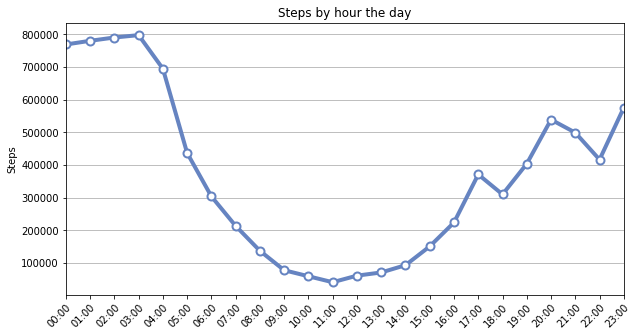

In [26]:
ax = hour_steps.Steps.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_steps.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

# ax.set_xlim((hour_steps.index[0], hour_steps.index[-1]))

ax.yaxis.grid(True)
# ax.set_ylim((0, 1300))
ax.set_ylabel('Steps')
ax.set_xlabel('')
ax.set_title('Steps by hour the day')

plt.show()

-----

In [27]:
weight = pd.read_csv("data/BodyMass.csv")

In [28]:
# weight.columns

In [29]:
# parse out date and time elements as Shanghai time
weight['startDate'] = pd.to_datetime(weight['startDate'])
weight['year'] = weight['startDate'].map(get_year)
weight['month'] = weight['startDate'].map(get_month)
weight['date'] = weight['startDate'].map(get_date)

In [30]:
weight.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date
131,Shortcuts,784,NaN,BodyMass,kg,2019-06-21 10:00:46 +0800,2019-06-21 10:00:46+08:00,2019-06-21 10:00:46 +0800,80.5,2019,2019-06,2019-06-21
132,Fitbod,2,NaN,BodyMass,kg,2019-06-23 12:32:38 +0800,2019-06-23 12:32:38+08:00,2019-06-23 12:32:38 +0800,80.5,2019,2019-06,2019-06-23
133,Shortcuts,784,NaN,BodyMass,kg,2019-06-26 21:26:41 +0800,2019-06-26 21:26:41+08:00,2019-06-26 21:26:41 +0800,80.3,2019,2019-06,2019-06-27
134,Fitbod,2,NaN,BodyMass,kg,2019-06-28 20:00:37 +0800,2019-06-28 20:00:37+08:00,2019-06-28 20:00:37 +0800,80.3,2019,2019-06,2019-06-29
135,Shortcuts,784,NaN,BodyMass,kg,2019-07-08 17:10:07 +0800,2019-07-08 17:10:07+08:00,2019-07-08 17:10:07 +0800,81.0,2019,2019-07,2019-07-09


In [31]:
month_weight = weight.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [32]:
# month_weight

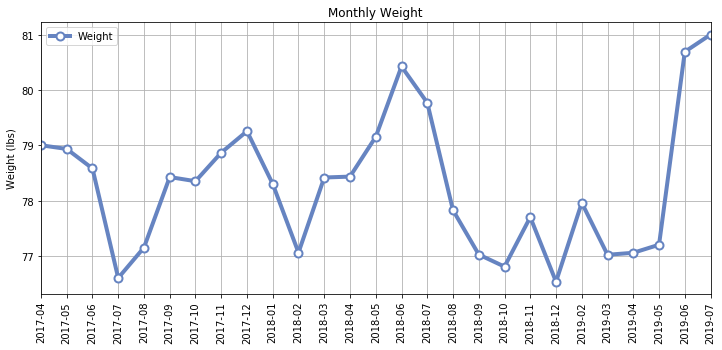

In [33]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (lbs)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [34]:
# convert to kg
month_weight['kg'] = round(month_weight['Weight'] / 2.205, 2)

In [35]:
month_weight.columns

Index(['month', 'Weight', 'kg'], dtype='object')

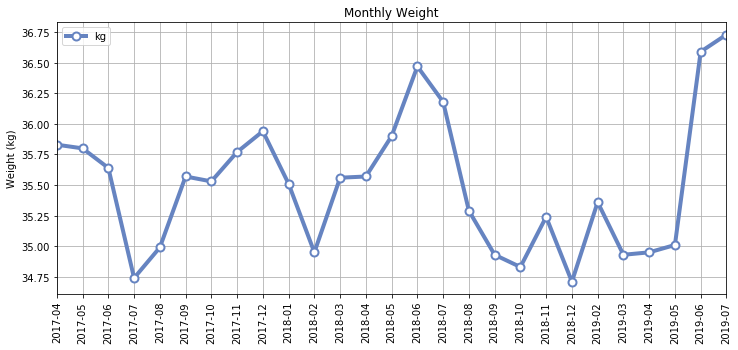

In [36]:
# a bit of a hackish solution, could use improvement
dataset = month_weight[['month', 'kg']]
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (kg)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

## TODO: Heart Rate

------

# Sleep

In [37]:
sleep_raw = pd.read_csv("data/SleepAnalysis.csv")

In [38]:
sleep_raw.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
6131,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-07-10 09:33:11 +0800,2019-07-10 01:30:00 +0800,2019-07-10 08:34:00 +0800,HKCategoryValueSleepAnalysisAsleep
6132,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-07-10 09:33:11 +0800,2019-07-10 01:30:00 +0800,2019-07-10 09:19:00 +0800,HKCategoryValueSleepAnalysisInBed
6133,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-07-10 09:33:11 +0800,2019-07-10 08:45:00 +0800,2019-07-10 09:19:00 +0800,HKCategoryValueSleepAnalysisAsleep
6134,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-07-11 10:04:51 +0800,2019-07-11 00:45:00 +0800,2019-07-11 10:03:00 +0800,HKCategoryValueSleepAnalysisInBed
6135,AutoSleep,6.2.9,NaN,SleepAnalysis,NaN,2019-07-11 10:04:51 +0800,2019-07-11 00:45:00 +0800,2019-07-11 10:03:00 +0800,HKCategoryValueSleepAnalysisAsleep


In [39]:
# parse out date and time elements as Shanghai time
steps['startDate'] = pd.to_datetime(steps['startDate'])
steps['year'] = steps['startDate'].map(get_year)
steps['month'] = steps['startDate'].map(get_month)
steps['date'] = steps['startDate'].map(get_date)
steps['day'] = steps['startDate'].map(get_day)
steps['hour'] = steps['startDate'].map(get_hour)
steps['dow'] = steps['startDate'].map(get_day_of_week)